In [4]:
import os
from PIL import Image
import util.image_import as ii
from glob import glob
import numpy as np
import tensorflow as tf
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras import regularizers
from keras import backend as K
import matplotlib.pyplot as plt
from keras.applications import mobilenet
from keras.layers import Dense, GlobalAveragePooling2D, Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from keras.models import Model, Sequential
from keras.callbacks import ModelCheckpoint
from keras import models
from keras import layers
from keras.utils.np_utils import to_categorical
from keras.optimizers import Adam, RMSprop, SGD
from util.plots import plot_history
from util.data_generator import make_data_generator
%matplotlib inline
%load_ext autoreload
%autoreload 2

#### Trick to configure gpu memory dynamically

In [2]:
cfg = K.tf.ConfigProto() # Config to dynamically add memory
cfg.gpu_options.allow_growth = True
K.set_session(K.tf.Session(config=cfg))# set this TensorFlow session as the default session for Keras.

### Making generators

In [5]:
batch_size = 32
train_path = '../dataset3/res_still/train'
test_path = '../dataset3/res_still/test'
train_generator, test_generator = make_data_generator(train_path, test_path, load_ram=False)

Found 1875 images belonging to 8 classes.
Found 472 images belonging to 8 classes.


In [6]:
model_optimized = Sequential()
model_optimized.add(Flatten(input_shape=(224,224,3)))
model_optimized.add(Dense(256))
model_optimized.add(Activation('relu'))
model_optimized.add(Dense(8))
model_optimized.add(Activation('softmax'))
model_optimized.compile(loss='categorical_crossentropy',
                        optimizer=Adam(lr=1e-4),
                        metrics=['accuracy'])

model_optimized.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 150528)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               38535424  
_________________________________________________________________
activation_1 (Activation)    (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 2056      
_________________________________________________________________
activation_2 (Activation)    (None, 8)                 0         
Total params: 38,537,480
Trainable params: 38,537,480
Non-trainable params: 0
_________________________________________________________________


### All classes with both types of catfood

In [7]:
# Checkpoint to save best model
file_path = 'saved_models/fcn_all_classes.e{epoch:02d}-a{val_acc:.2f}.hdf5'
checkpoint = ModelCheckpoint(file_path, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callback_list = [checkpoint]

In [9]:
history_optimized = model_optimized.fit_generator(
                    train_generator,
                    steps_per_epoch=1875 // batch_size,
                    epochs=150,
                    validation_data=test_generator,
                    validation_steps=472 // batch_size,
                    use_multiprocessing=True,
                    workers=2,
                    callbacks=callback_list)


Epoch 1/150
58/58 [==============================] - 23s 399ms/step - loss: 2.8191 - acc: 0.2077 - val_loss: 1.6725 - val_acc: 0.4531

Epoch 00001: val_acc improved from -inf to 0.45312, saving model to saved_models/fcn_all_classes.e01-a0.45.hdf5
Epoch 2/150
58/58 [==============================] - 28s 476ms/step - loss: 2.2773 - acc: 0.2901 - val_loss: 1.3012 - val_acc: 0.4888

Epoch 00002: val_acc improved from 0.45312 to 0.48884, saving model to saved_models/fcn_all_classes.e02-a0.49.hdf5
Epoch 3/150
58/58 [==============================] - 28s 481ms/step - loss: 1.9454 - acc: 0.3456 - val_loss: 1.3740 - val_acc: 0.4844

Epoch 00003: val_acc did not improve from 0.48884
Epoch 4/150
58/58 [==============================] - 31s 541ms/step - loss: 2.1103 - acc: 0.3477 - val_loss: 1.2956 - val_acc: 0.5312

Epoch 00004: val_acc improved from 0.48884 to 0.53125, saving model to saved_models/fcn_all_classes.e04-a0.53.hdf5
Epoch 5/150
58/58 [==============================] - 31s 541ms/step 

58/58 [==============================] - 26s 453ms/step - loss: 1.0086 - acc: 0.6851 - val_loss: 0.6851 - val_acc: 0.7991

Epoch 00039: val_acc did not improve from 0.80804
Epoch 40/150
58/58 [==============================] - 27s 458ms/step - loss: 0.9240 - acc: 0.6964 - val_loss: 0.7010 - val_acc: 0.7879

Epoch 00040: val_acc did not improve from 0.80804
Epoch 41/150
58/58 [==============================] - 27s 467ms/step - loss: 0.9209 - acc: 0.7090 - val_loss: 0.7943 - val_acc: 0.7812

Epoch 00041: val_acc did not improve from 0.80804
Epoch 42/150
58/58 [==============================] - 28s 479ms/step - loss: 0.9446 - acc: 0.6810 - val_loss: 0.7154 - val_acc: 0.8036

Epoch 00042: val_acc did not improve from 0.80804
Epoch 43/150
58/58 [==============================] - 26s 450ms/step - loss: 0.8995 - acc: 0.7288 - val_loss: 0.6965 - val_acc: 0.7902

Epoch 00043: val_acc did not improve from 0.80804
Epoch 44/150
58/58 [==============================] - 28s 474ms/step - loss: 0.9783

58/58 [==============================] - 27s 472ms/step - loss: 0.5895 - acc: 0.7972 - val_loss: 0.5510 - val_acc: 0.8371

Epoch 00080: val_acc did not improve from 0.85938
Epoch 81/150
58/58 [==============================] - 27s 466ms/step - loss: 0.6928 - acc: 0.7744 - val_loss: 0.5911 - val_acc: 0.8348

Epoch 00081: val_acc did not improve from 0.85938
Epoch 82/150
58/58 [==============================] - 29s 493ms/step - loss: 0.7323 - acc: 0.7856 - val_loss: 0.5696 - val_acc: 0.8326

Epoch 00082: val_acc did not improve from 0.85938
Epoch 83/150
58/58 [==============================] - 27s 472ms/step - loss: 0.6884 - acc: 0.7760 - val_loss: 0.5565 - val_acc: 0.8371

Epoch 00083: val_acc did not improve from 0.85938
Epoch 84/150
58/58 [==============================] - 30s 512ms/step - loss: 0.5928 - acc: 0.8042 - val_loss: 0.4969 - val_acc: 0.8371

Epoch 00084: val_acc did not improve from 0.85938
Epoch 85/150
58/58 [==============================] - 27s 466ms/step - loss: 0.6700

58/58 [==============================] - 27s 465ms/step - loss: 0.4892 - acc: 0.8196 - val_loss: 0.5025 - val_acc: 0.8638

Epoch 00123: val_acc did not improve from 0.87946
Epoch 124/150
58/58 [==============================] - 27s 470ms/step - loss: 0.5399 - acc: 0.8153 - val_loss: 0.5820 - val_acc: 0.8594

Epoch 00124: val_acc did not improve from 0.87946
Epoch 125/150
58/58 [==============================] - 27s 471ms/step - loss: 0.5322 - acc: 0.8227 - val_loss: 0.5944 - val_acc: 0.8616

Epoch 00125: val_acc did not improve from 0.87946
Epoch 126/150
58/58 [==============================] - 27s 470ms/step - loss: 0.4611 - acc: 0.8342 - val_loss: 0.5461 - val_acc: 0.8683

Epoch 00126: val_acc did not improve from 0.87946
Epoch 127/150
58/58 [==============================] - 27s 466ms/step - loss: 0.5194 - acc: 0.8137 - val_loss: 0.5863 - val_acc: 0.8638

Epoch 00127: val_acc did not improve from 0.87946
Epoch 128/150
58/58 [==============================] - 26s 451ms/step - loss: 0

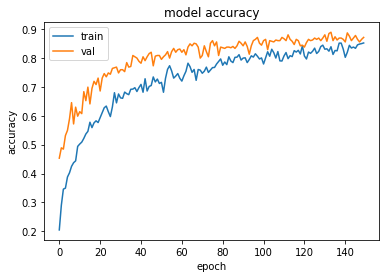

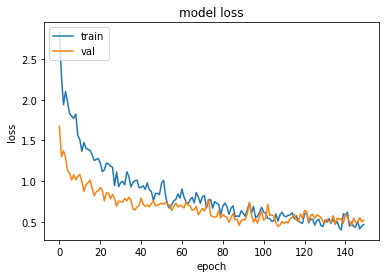

In [10]:
plot_history(history_optimized, save=True, path='nets/feedforward/', name='fcn_all_classes')

### Not trained on catfood_beef
* Catfood beef and catfood salmon is in some picture identical so it is not possible to differentiate between the two classes, thus a model is trained without catfood beef

In [ ]:
batch_size = 32
train_path = '../dataset3/res_still/train'
test_path = '../dataset3/res_still/test'
train_generator, test_generator = make_data_generator(train_path, test_path, load_ram=False, ignore=['catfood_beef'])

In [4]:
model_optimized = Sequential()
model_optimized.add(Flatten(input_shape=(224,224,3)))
model_optimized.add(Dense(256))
model_optimized.add(Activation('relu'))
model_optimized.add(Dense(7))
model_optimized.add(Activation('softmax'))
model_optimized.compile(loss='categorical_crossentropy',
                        optimizer=Adam(lr=1e-4),
                        metrics=['accuracy'])

model_optimized.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 150528)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               38535424  
_________________________________________________________________
activation_1 (Activation)    (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 7)                 1799      
_________________________________________________________________
activation_2 (Activation)    (None, 7)                 0         
Total params: 38,537,223
Trainable params: 38,537,223
Non-trainable params: 0
_________________________________________________________________


In [5]:
# Checkpoint to save best model
file_path = 'saved_models/fcn_without_catbeef.e{epoch:02d}-a{val_acc:.2f}.hdf5'
checkpoint = ModelCheckpoint(file_path, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callback_list = [checkpoint]

In [6]:
history = model_optimized.fit_generator(
            train_generator,
            steps_per_epoch=1641 // batch_size,
            epochs=100,
            validation_data=test_generator,
            validation_steps=413 // batch_size,
            use_multiprocessing=True,
            workers=2,
            callbacks=callback_list)

Epoch 1/100
51/51 [==============================] - 27s 532ms/step - loss: 2.8646 - acc: 0.2228 - val_loss: 1.4025 - val_acc: 0.4792

Epoch 00001: val_acc improved from -inf to 0.47917, saving model to saved_models/fcn_without_catbeef.e01-a0.48.hdf5
Epoch 2/100
51/51 [==============================] - 28s 545ms/step - loss: 1.9852 - acc: 0.3543 - val_loss: 1.3037 - val_acc: 0.5625

Epoch 00002: val_acc improved from 0.47917 to 0.56250, saving model to saved_models/fcn_without_catbeef.e02-a0.56.hdf5
Epoch 3/100
51/51 [==============================] - 31s 609ms/step - loss: 2.1096 - acc: 0.3665 - val_loss: 1.3078 - val_acc: 0.5677

Epoch 00003: val_acc improved from 0.56250 to 0.56771, saving model to saved_models/fcn_without_catbeef.e03-a0.57.hdf5
Epoch 4/100
51/51 [==============================] - 32s 618ms/step - loss: 1.9097 - acc: 0.3907 - val_loss: 1.0895 - val_acc: 0.5833

Epoch 00004: val_acc improved from 0.56771 to 0.58333, saving model to saved_models/fcn_without_catbeef.e0

Epoch 39/100
51/51 [==============================] - 27s 523ms/step - loss: 0.8887 - acc: 0.7723 - val_loss: 0.6115 - val_acc: 0.8047

Epoch 00039: val_acc did not improve from 0.83594
Epoch 40/100
51/51 [==============================] - 29s 567ms/step - loss: 0.6491 - acc: 0.7999 - val_loss: 0.5339 - val_acc: 0.7995

Epoch 00040: val_acc did not improve from 0.83594
Epoch 41/100
51/51 [==============================] - 27s 522ms/step - loss: 0.7506 - acc: 0.7895 - val_loss: 0.6459 - val_acc: 0.7891

Epoch 00041: val_acc did not improve from 0.83594
Epoch 42/100
51/51 [==============================] - 27s 537ms/step - loss: 0.8086 - acc: 0.7475 - val_loss: 0.5274 - val_acc: 0.8333

Epoch 00042: val_acc did not improve from 0.83594
Epoch 43/100
51/51 [==============================] - 29s 565ms/step - loss: 0.5962 - acc: 0.8032 - val_loss: 0.5716 - val_acc: 0.8359

Epoch 00043: val_acc did not improve from 0.83594
Epoch 44/100
51/51 [==============================] - 28s 547ms/step -

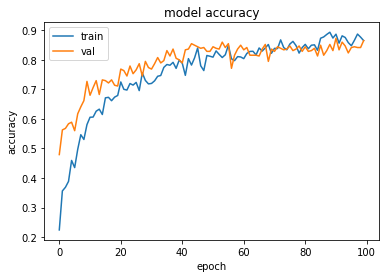

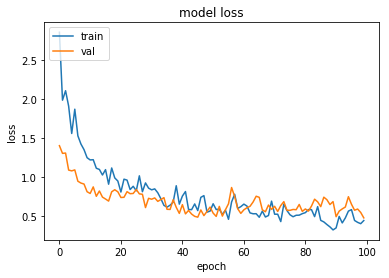

In [7]:
plot_history(history, save=True, path='nets/feedforward/', name='fcn_without_catbeef')

The above training on all classes and training without catfood beef is summurized below:

|Summarize             | Epoch | Training Loss | Training Accuracy | Validation Loss | Validation Accuracy |
|:--------------------:|:-----:|:-------------:|:-----------------:|:---------------:|:-------------------:|
| All Classes          |  134  |     0.4819    |      0.8391       |      0.5007     |        0.8884       |
| Without catfood beef |   91  |     0.3475    |      0.8863       |      0.4914     |        0.8724       |

The results is the best achieved validation accuracy with the respectivly training accuracy. 
<span style="color:red"> Conlclude on these</span>